# CMPINF 0010 Final Project Group Notebook

## Introduction



## The Metric



## The Best Neighborhood

### Submetric 1 - 

### Submetric 2 - Proportion with Diploma

The second submetric that we chose in order to determine bestness was the proportion of people in each neighborhood that have obtained at least a high school diploma. To achieve the prior, a dataset containing demographic information on the highest level of schooling completed by residents of each neighborhood in Pittsburgh was utilized. Note that each record in the dataset represents a neighborhood, and that the columns are categorical based on highest completed education level up to a doctorate degree; thus, by "at least," we are operating under the assumption that individuals falling under any of the categories dealing with higher education (e.g. college level) have a high school diploma. Additionally, we are considering anyone with a GED as possessing a high school diploma.

As our first step, we read in the data and observe its features:

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load in the data
df_raw = pd.read_csv("education_data.csv")
df_raw.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,Allegheny Center,1,791.0,140.000000,7.0,11.000000,0.0,10.000000,0.0,10.000000,...,53.0,38.000000,176.0,73.000000,74.0,66.000000,88.0,50.000000,6.0,9.000000
1,Allegheny West,2,283.0,92.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,25.0,19.000000,121.0,61.000000,12.0,13.000000,13.0,16.000000,6.0,9.000000
2,Allentown,3,1611.0,247.786198,14.0,24.494897,0.0,17.320508,0.0,17.320508,...,59.0,43.046487,72.0,50.049975,38.0,28.635642,30.0,29.748950,0.0,17.320508
3,Arlington,4,1271.0,224.512806,37.0,39.560081,0.0,17.320508,0.0,17.320508,...,124.0,54.378304,84.0,46.173586,13.0,13.038405,2.0,14.696938,0.0,17.320508
4,Arlington Heights,5,182.0,108.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


It can be seen that any column containing the string "Estimate; Total:" houses the counts of people that fall under each category/neighborhood (which we need), and that any column containing the string "Margin of Error" encloses a statistic that is completely unnecessary for the analysis we intend on doing; thus, for simplicity, we eliminate the extra columns:

In [10]:
# Drop unnecessary columns
df = df_raw.drop(columns = [col for col in df_raw.columns if "Margin of Error;" in col or col == "Id"])
df.head()

,Neighborhood,Estimate; Total:,Estimate; Total: - No schooling completed,Estimate; Total: - Nursery school,Estimate; Total: - Kindergarten,Estimate; Total: - 1st grade,Estimate; Total: - 2nd grade,Estimate; Total: - 3rd grade,Estimate; Total: - 4th grade,Estimate; Total: - 5th grade,...,"Estimate; Total: - 12th grade, no diploma",Estimate; Total: - Regular high school diploma,Estimate; Total: - GED or alternative credential,"Estimate; Total: - Some college, less than 1 year","Estimate; Total: - Some college, 1 or more years, no degree",Estimate; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Estimate; Total: - Professional school degree,Estimate; Total: - Doctorate degree
0,Allegheny Center,791.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,156.0,0.0,33.0,110.0,53.0,176.0,74.0,88.0,6.0
1,Allegheny West,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,15.0,10.0,18.0,25.0,121.0,12.0,13.0,6.0
2,Allentown,1611.0,14.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,40.0,603.0,217.0,131.0,337.0,59.0,72.0,38.0,30.0,0.0
3,Arlington,1271.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,439.0,116.0,74.0,251.0,124.0,84.0,13.0,2.0,0.0
4,Arlington Heights,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,17.0,9.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0


We now have exactly what we need to start performing our analysis. For each neighborhood, we want to count how many people have at least a high school diploma and save the result as an additional column in our dataframe. Since the columns are roughly ordered from most to least primitive form of education (from left to right) and given that the count of individuals with a high school diploma is recorded in the ninth column from the right, we must sum the values in the last 9 columns of the dataset. Additionally, we restrict the view of our dataset to the columns that are important for future steps:

In [12]:
# Count the number of individuals in each neighborhood with at least a high school diploma & save as new column to the dataframe
df["Number w/ Diploma"] = df[df.columns[-9:]].sum(axis=1)
df[["Neighborhood", "Estimate; Total:", "Number w/ Diploma"]]

,Neighborhood,Estimate; Total:,Number w/ Diploma
0,Allegheny Center,791.0,696.0
1,Allegheny West,283.0,255.0
2,Allentown,1611.0,1487.0
3,Arlington,1271.0,1103.0
4,Arlington Heights,182.0,52.0
...,...,...,...
86,Upper Lawrenceville,2028.0,1845.0
87,West End,112.0,112.0
88,West Oakland,772.0,688.0
89,Westwood,2601.0,2268.0


To obtain the proportion (per neighborhood) of individuals with at least a high school diploma, we must divide the column containing the number of individuals with at least a high school diploma per neighborhood by the total number of residents per neighborhood. Not only do we restrict our view of the dataset to contain only the columns that are important to us, but we also save the view to a separate dataframe in order to simplify our final result:

In [14]:
# Divide number of individuals with diploma by total number of individuals to get proportion of individuals with diploma
df["Proportion w/ Diploma"] = df["Number w/ Diploma"] / df["Estimate; Total:"]

# Filter dataframe for important columns only & assign to new dataframe object
df_small = df[["Neighborhood", "Estimate; Total:", "Number w/ Diploma", "Proportion w/ Diploma"]]
df_small

,Neighborhood,Estimate; Total:,Number w/ Diploma,Proportion w/ Diploma
0,Allegheny Center,791.0,696.0,0.879899
1,Allegheny West,283.0,255.0,0.901060
2,Allentown,1611.0,1487.0,0.923029
3,Arlington,1271.0,1103.0,0.867821
4,Arlington Heights,182.0,52.0,0.285714
...,...,...,...,...
86,Upper Lawrenceville,2028.0,1845.0,0.909763
87,West End,112.0,112.0,1.000000
88,West Oakland,772.0,688.0,0.891192
89,Westwood,2601.0,2268.0,0.871972


Among our final steps of the process is to sort the data in descending order by the proportion of individuals in each neighborhood that possess at least a high school diploma in order to facilitate visual analysis:

In [16]:
# Sort by proportion of individuals with diploma
df_small_sorted = df_small.sort_values("Proportion w/ Diploma", ascending=False)
df_small_sorted

,Neighborhood,Estimate; Total:,Number w/ Diploma,Proportion w/ Diploma
57,North Shore,159.0,159.0,1.000000
80,Strip District,611.0,611.0,1.000000
71,South Shore,8.0,8.0,1.000000
87,West End,112.0,112.0,1.000000
64,Point Breeze North,1527.0,1514.0,0.991487
...,...,...,...,...
49,Marshall-Shadeland,4834.0,3567.0,0.737898
58,Northview Heights,551.0,399.0,0.724138
35,Glen Hazel,501.0,340.0,0.678643
4,Arlington Heights,182.0,52.0,0.285714


Before visualizing the data, we must first clean it by renaming the columns of our dataframe (which buttresses both the readability and interpretability of the data). Since an entry exists within our dataset that contains a count of 0 total residents (as visible in the above view towards the bottom; the record of the Chateau neighborhood), a zero division occured in our calculation of proportion which resulted in a missing ("NaN") value. The value must be converted into a 0 in order to comply with both the visualization function calls and the mathematical definition of a proportion:

In [18]:
# Remove NaN values created through zero division and rename columns for clarity
education_data = df_small_sorted.fillna(0).rename(columns = {"Estimate; Total:":"Number of People"})
education_data

,Neighborhood,Number of People,Number w/ Diploma,Proportion w/ Diploma
57,North Shore,159.0,159.0,1.000000
80,Strip District,611.0,611.0,1.000000
71,South Shore,8.0,8.0,1.000000
87,West End,112.0,112.0,1.000000
64,Point Breeze North,1527.0,1514.0,0.991487
...,...,...,...,...
49,Marshall-Shadeland,4834.0,3567.0,0.737898
58,Northview Heights,551.0,399.0,0.724138
35,Glen Hazel,501.0,340.0,0.678643
4,Arlington Heights,182.0,52.0,0.285714


Finally, we are able to create our visualization:

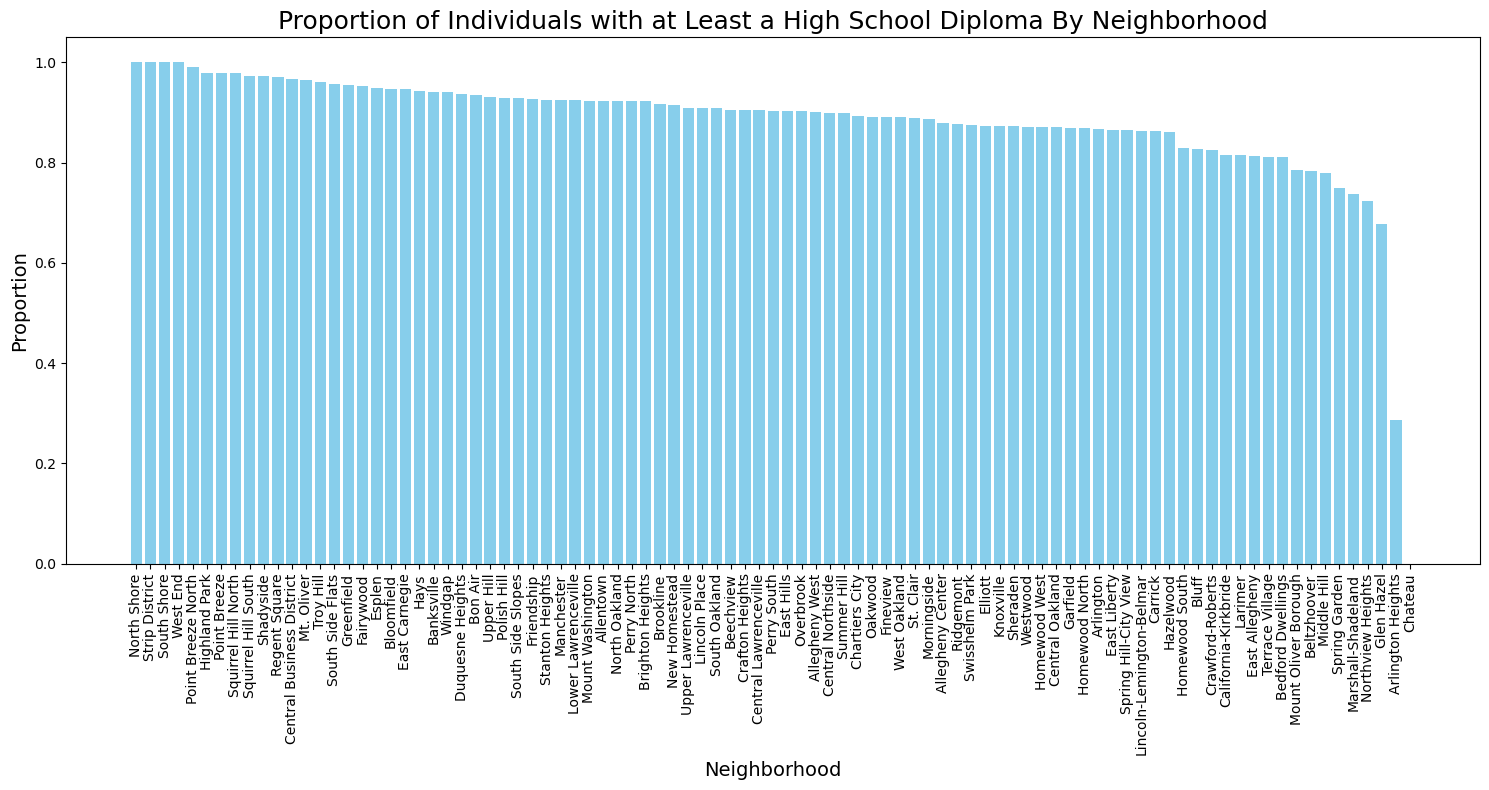

In [20]:
# Visualizing the results (with a bar plot)
plt.figure(figsize=(15, 8)) # Set the size of the plot to make labels well-spaced
plt.bar(education_data["Neighborhood"], education_data["Proportion w/ Diploma"], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Proportion of Individuals with at Least a High School Diploma By Neighborhood", fontsize = 18)
plt.xlabel("Neighborhood", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.tight_layout() # Adjust spacing so all elements fit well within the figure
plt.show()

Note that a four-way tie in the proportion submetric exists between the neighborhoods of North Shore, Strip District, South Shore, and West End; therefore, if you exclusively consider the submetric calculated in this section, one could argue that all of the aforementioned neighborhoods are equal in their bestness.

### Submetric 3 - Housing Value

Determine how many luxurious homes are there in each neighbourhood. We define luxurious as at least $500,000. 


In [24]:
# Load the CSV file
housing_data = pd.read_csv("housing value.csv")
housing_data

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999",...,"Estimate; Total: - $300,000 to $399,999","Margin of Error; Total: - $300,000 to $399,999","Estimate; Total: - $400,000 to $499,999","Margin of Error; Total: - $400,000 to $499,999","Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 or more","Margin of Error; Total: - $1,000,000 or more"
0,1,Allegheny Center,1,38,19.000000,0,10.000000,0,10.000000,0,...,0,10.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
1,2,Allegheny West,2,77,34.000000,6,9.000000,0,10.000000,0,...,17,19.000000,0,10.000000,0,10.000000,0,10.000000,6,9.000000
2,3,Allentown,3,575,124.004032,48,36.400549,19,21.840330,32,...,0,17.320508,0,17.320508,5,16.248077,0,17.320508,0,17.320508
3,4,Arlington,4,469,93.866927,6,17.320508,16,19.339080,6,...,0,17.320508,0,17.320508,0,17.320508,0,17.320508,2,14.696938
4,5,Arlington Heights,5,0,10.000000,0,10.000000,0,10.000000,0,...,0,10.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,689,133.334167,0,17.320508,11,24.494897,19,...,14,27.000000,0,17.320508,0,17.320508,0,17.320508,0,17.320508
87,88,West End,88,39,29.000000,0,10.000000,0,10.000000,0,...,4,8.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
88,89,West Oakland,89,173,59.203040,0,14.142136,0,14.142136,5,...,0,14.142136,5,12.206556,0,14.142136,0,14.142136,0,14.142136
89,90,Westwood,90,996,105.361283,21,23.430749,0,14.142136,0,...,0,14.142136,0,14.142136,0,14.142136,0,14.142136,0,14.142136


First step, we filter out any unnecessary columns.

In [25]:
# Filter out columns that contain "Margin of Error" in their name
# The ~ symbol negates the boolean values, switching True to False and vice versa.
# This results in True for columns not containing "Margin of Error" and False for those that do.
filtered_data = housing_data.loc[:, ~housing_data.columns.str.contains("Margin of Error")]

# Remove the redundant 'Id' column 
filtered_data = filtered_data.loc[:, ~filtered_data.columns.str.contains("Id", case=False)]

# Display the filtered data
filtered_data

,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $49,999",...,"Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $174,999","Estimate; Total: - $175,000 to $199,999","Estimate; Total: - $200,000 to $249,999","Estimate; Total: - $250,000 to $299,999","Estimate; Total: - $300,000 to $399,999","Estimate; Total: - $400,000 to $499,999","Estimate; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 or more"
0,Allegheny Center,38,0,0,0,0,0,0,0,0,...,12,0,15,0,0,0,0,0,0,0
1,Allegheny West,77,6,0,0,0,0,0,0,0,...,6,0,0,6,9,17,0,0,0,6
2,Allentown,575,48,19,32,49,64,52,21,101,...,12,0,0,0,0,0,0,5,0,0
3,Arlington,469,6,16,6,41,54,57,50,61,...,0,0,0,10,0,0,0,0,0,2
4,Arlington Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,689,0,11,19,51,29,21,89,32,...,20,38,7,0,9,14,0,0,0,0
87,West End,39,0,0,0,10,0,0,0,0,...,0,9,0,0,0,4,0,0,0,0
88,West Oakland,173,0,0,5,0,0,16,0,25,...,0,0,0,5,3,0,5,0,0,0
89,Westwood,996,21,0,0,0,0,0,17,26,...,106,76,0,116,14,0,0,0,0,0


We filter the data set again to visualize columns

In [27]:
# Filter to only include the 'Neighborhood' column and columns with specific ranges in their names
columns_to_keep = ['Neighborhood'] + [
    col for col in filtered_data.columns 
    if "$500,000 to $749,999" in col or 
       "$750,000 to $999,999" in col or 
       "$1,000,000 or more" in col
]

# Create the filtered dataset
filtered_specific_data = filtered_data[columns_to_keep]

# Create a copy of the DataFrame to avoid modifying a slice of the original DataFrame
filtered_specific_data = filtered_specific_data.copy()

# Sum up the filtered values for each neighborhood (excluding the 'Neighborhood' column)
filtered_specific_data['Total'] = filtered_specific_data.iloc[:, 1:].sum(axis=1)

# Display the resulting dataset with totals
filtered_specific_data

,Neighborhood,"Estimate; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 or more",Total
0,Allegheny Center,0,0,0,0
1,Allegheny West,0,0,6,6
2,Allentown,5,0,0,5
3,Arlington,0,0,2,2
4,Arlington Heights,0,0,0,0
...,...,...,...,...,...
86,Upper Lawrenceville,0,0,0,0
87,West End,0,0,0,0
88,West Oakland,0,0,0,0
89,Westwood,0,0,0,0


In [28]:
# Normalize the 'Total' values to a range of 0 to 1
filtered_specific_data['Normalized Total'] = (
    filtered_specific_data['Total'] - filtered_specific_data['Total'].min()
) / (filtered_specific_data['Total'].max() - filtered_specific_data['Total'].min())

# Create a new table with only the Neighborhood and Normalized Total columns
normalized_table = filtered_specific_data[['Neighborhood', 'Normalized Total']]

# Display the resulting table
normalized_table


,Neighborhood,Normalized Total
0,Allegheny Center,0.000000
1,Allegheny West,0.008011
2,Allentown,0.006676
3,Arlington,0.002670
4,Arlington Heights,0.000000
...,...,...
86,Upper Lawrenceville,0.000000
87,West End,0.000000
88,West Oakland,0.000000
89,Westwood,0.000000


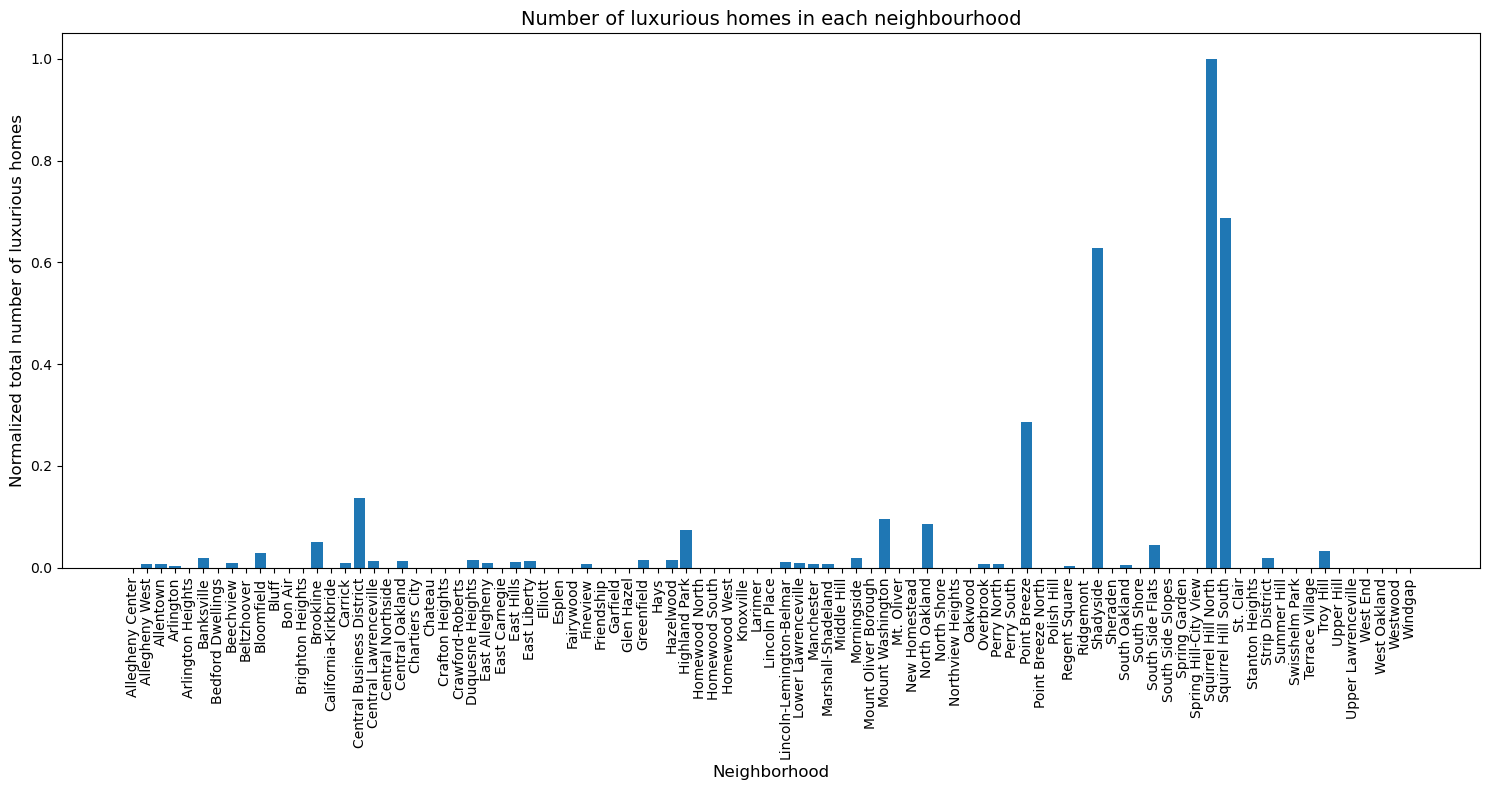

In [29]:
# Create a bar graph with neighborhood names on the x-axis and normalized total values on the y-axis
plt.figure(figsize=(15, 8))
plt.bar(filtered_specific_data['Neighborhood'], filtered_specific_data['Normalized Total'])

# Customize the chart
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Normalized total number of luxurious homes', fontsize=12)
plt.title('Number of luxurious homes in each neighbourhood', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()

### Applying the Metric

## Conclusions